In [2]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

# SWAP Test

The Swap Test is a small circuit that allows to compute the fidelity between two quantum states. It uses a control qbit and 2 registers that encodes the quatum states $|\phi\rangle$ and $|\psi\rangle$ that we want to compare.

At the start of the circuit the ssytem is in the state 

$$|0\phi\psi\rangle$$. 

We then apply a H gate on the first qbit leading to 

$$\frac{1}{\sqrt{2}} (|0\phi\psi\rangle + |1\phi\psi\rangle )$$

We then apply a comtrolled swap gate :

$$\frac{1}{\sqrt{2}} (|0\phi\psi\rangle + |1\psi\phi\rangle )$$

and another H gate on the first qbit 

$$\frac{1}{2} (|0\phi\psi\rangle + |1\phi\psi\rangle + |0\psi\phi\rangle - |1\psi\phi\rangle )$$

By rearraging all that we have

$$\frac{1}{2} |0\rangle (|\phi\psi\rangle + |\psi\phi\rangle) +\frac{1}{2} |1\rangle(\phi\psi\rangle - |\psi\phi\rangle)$$

The probablity to measure the control qbit in state 0 is then given by :

$$P(0) = \frac{1}{2}(\langle\phi\psi| + \langle\psi\phi|) \frac{1}{2}( |\phi\psi\rangle + |\psi\phi\rangle) = \frac{1}{2}(1+|\langle\psi|\phi\rangle|^2)$$

and the probability to measure 1 on the control qbit is :


$$P(1) = \frac{1}{2}(\langle\phi\psi| - \langle\psi\phi|) \frac{1}{2}( |\phi\psi\rangle - |\psi\phi\rangle) = \frac{1}{2}(1-|\langle\psi|\phi\rangle|^2)$$

In [3]:
# Use Aer's qasm_simulator
simulator = QasmSimulator()


Total count for 0 and 1 are: {'1': 506, '0': 494}


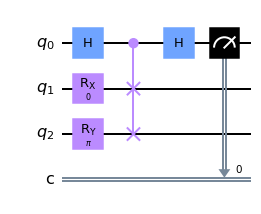

In [25]:
# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(3, 1)

# rotate the first qubit
circuit.rx(0,1)

# rotate the first qubit
circuit.ry(np.pi,2)

# add a H gate on qubit 0
circuit.h(0)

# Add a Control swap gate
circuit.cswap(0,1,2)

# add the final H gate
circuit.h(0)

# Map the quantum measurement to the classical bits
circuit.measure(0,0)

# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 0 and 1 are:",counts)

# Draw the circuit
circuit.draw(output='mpl')

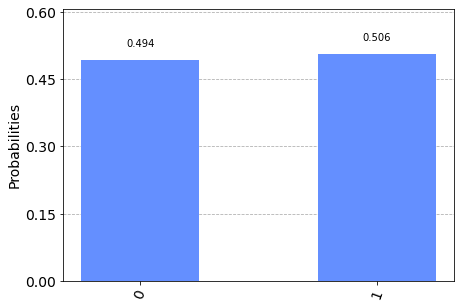

In [26]:
plot_histogram(counts)